# Sentiment Analysis of Audience Reactions to Avengers: Endgame
#
#### Overview: The scope of the project is the assessment of audience reception of Avengers: Endgame, a blockbuster movie, through sentiment analysis techniques. 

#### This will be completed when data is brought out and processed from social media sites, forums, or reviews concerning what the general population is feeling about this cinematic motion picture. With sentamental analysis, it is in relation to how people in general felt about such matters relating to the movie itself.
#
## Objectives:

#### Data Collection: Gather the audience responses from sources ranging from Twitter. These data will be the foundation on which the analysis is drawn.

#### Data Cleaning: Remove noise, such as irrelevant text, special characters, and stopwords, from the data collected so that it can be in analyzable form.

#### Sentiment Classification: Use NLP techniques to classify the sentiment of each reaction into one of the categories: positive, negative, or neutral.

#### Insight Generation: From the sentiment distribution, deduce general audience perception along with any emergent trends—it can be the most liked scenes or characters.

#

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import nltk
nltk.download('punkt_tab')


# Apply the process_text function to the 'clean_text' column
df['processed_text'] = df['clean_text'].apply(process_text)

# Now, check if the 'processed_text' column is created
print(df['processed_text'].head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


0              literally nobody
1             emotional sorry x
2    saving bingo card tomorrow
3             man ad everywhere
4                        salute
Name: processed_text, dtype: object


In [6]:
import pandas as pd
from nltk.tokenize import word_tokenize
df = pd.read_csv('tweets_cleaned.csv')

# Example of tokenizing a single text sample
sample_text = df['clean_text'][0]
tokens = word_tokenize(sample_text)
print(tokens)


['literally', 'nobody', 'me']


In [18]:
from nltk.corpus import stopwords

# Load stopwords for English
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)


['literally', 'nobody']


In [24]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

all_tokens = [word for text in df['processed_text'] for word in word_tokenize(text)]
fdist = FreqDist(all_tokens)
print(fdist.most_common(20))  


[('man', 2150), ('premiere', 1611), ('ad', 1457), ('everywhere', 1456), ('marvel', 1211), ('rt', 1026), ('scarlett', 970), ('win', 952), ('cried', 894), ('chris', 891), ('like', 867), ('salute', 824), ('world', 790), ('time', 752), ('avenger', 719), ('johansson', 715), ('chance', 689), ('get', 685), ('carpet', 678), ('movie', 660)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of distinct words: 3433


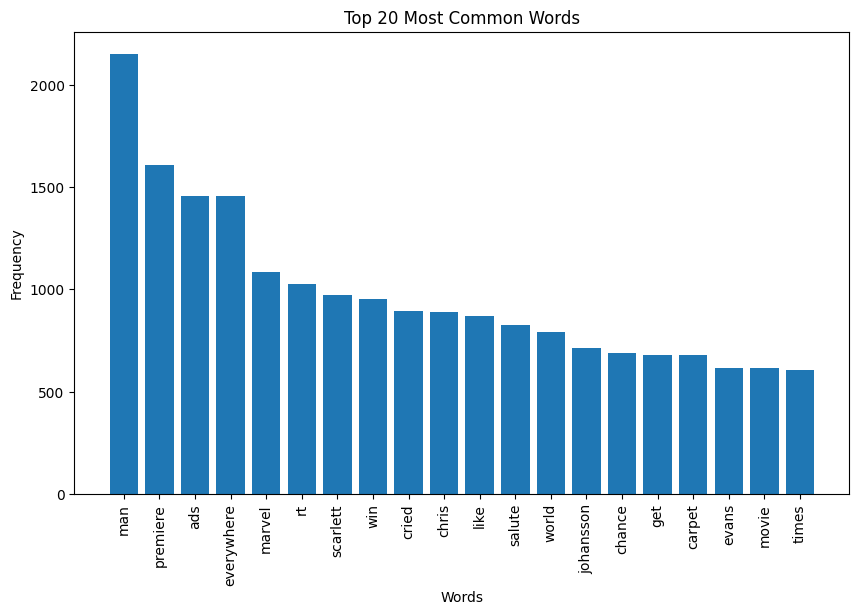

In [26]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Sample data (replace with your actual DataFrame)
df = pd.read_csv('tweets_cleaned.csv')

# Apply tokenization and remove stopwords
stop_words = set(stopwords.words('english'))

# Assuming 'clean_text' column holds the text data
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenize and convert to lowercase

# Remove stopwords from tokens
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

# Combine all filtered tokens into one list for frequency distribution
all_tokens = [word for tokens in df['filtered_tokens'] for word in tokens]

# Create frequency distribution
fdist = FreqDist(all_tokens)

# Debugging: Print the number of distinct words
print(f"Number of distinct words: {len(fdist)}")

# Get the 20 most common words
top_20 = fdist.most_common(20)

# Separate the words and their frequencies
words, frequencies = zip(*top_20)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')

# Show the plot
plt.show()


In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each processed text
df['sentiment'] = df['processed_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Check the first few rows of sentiment
print(df[['processed_text', 'sentiment']].head())


               processed_text  sentiment
0            literally nobody     0.0000
1           emotional sorry x     0.0772
2  saving bingo card tomorrow     0.0000
3           man ad everywhere     0.0000
4                      salute     0.0000


In [23]:
from textblob import TextBlob

# Apply TextBlob sentiment analysis
df['sentiment_tb'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check sentiment
print(df[['processed_text', 'sentiment_tb']].head())


               processed_text  sentiment_tb
0            literally nobody          0.00
1           emotional sorry x         -0.25
2  saving bingo card tomorrow          0.00
3           man ad everywhere          0.00
4                      salute          0.00


In [9]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('tweets_cleaned.csv')  # Update with your actual file path

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing text
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic words, and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    
    # Return processed text
    return " ".join(tokens)

# Apply preprocessing to the 'clean_text' column
df['processed_text'] = df['clean_text'].apply(process_text)

# Save the processed data to a new CSV file
df.to_csv('tweets_processed.csv', index=False)

print("Preprocessing complete. Processed data saved as 'tweets_processed.csv'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing complete. Processed data saved as 'tweets_processed.csv'.


In [13]:
import pandas as pd

# Specify the file path
file_path = 'tweets_processed.csv'

# Load the dataset
data = pd.read_csv(file_path)

# View the first few rows
data.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,clean_text,processed_text
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\n#AvengersEndgame https://t.co/LR9kFwfD5c,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",DavidAc96,637,True,False,NaN,NaN,literally nobody me,literally nobody
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\n2014 x 2019\r\n#blackwidow\r\n#captainamerica https://t.co/xcwkCMw18w",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NRmalaa,302,True,False,NaN,NaN,i’m emotional sorry x,emotional sorry x
2,3,saving these bingo cards for tomorrow \r\n©\r\n #AvengersEndgame https://t.co/d6For0jwRb,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",jijitsuu,0,False,False,NaN,NaN,saving these bingo cards for tomorrow,saving bingo card tomorrow
3,4,RT @HelloBoon: Man these #AvengersEndgame ads are everywhere https://t.co/Q0lNf5eJsX,False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",SahapunB,23781,True,False,NaN,NaN,man these ads are everywhere,man ad everywhere
4,5,"RT @Marvel: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/VlPEpnXYgm",False,0,NaN,23/4/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",stella22_97,13067,True,False,NaN,NaN,we salute you,salute


In [15]:
# Adjust display option
pd.set_option('display.max_colwidth', None)

# View the first few rows with full text


data[['processed_text']].head(60)

,processed_text
0,literally nobody
1,emotional sorry x
2,saving bingo card tomorrow
3,man ad everywhere
4,salute
5,first critic reaction nearly exceptionally positive many
6,ready rock
7,til end line
8,first reaction emotional epic mcu film
9,man ad everywhere


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


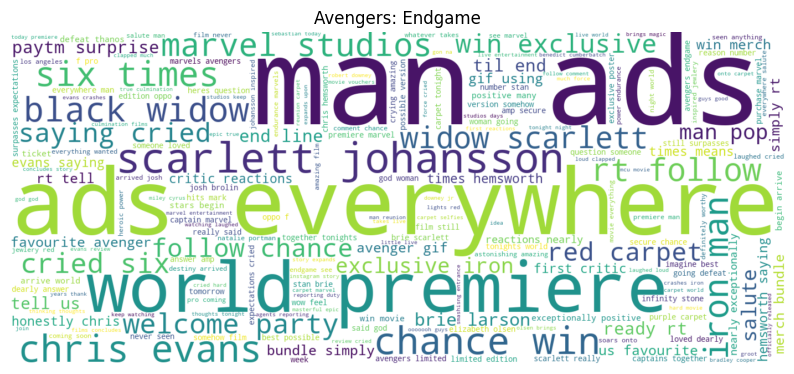

In [7]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset (replace with the correct path to your CSV)
df = pd.read_csv('tweets_cleaned.csv')

# Apply tokenization and remove stopwords
stop_words = set(stopwords.words('english'))

# Assuming 'clean_text' column holds the text data
df['tokens'] = df['clean_text'].apply(lambda x: word_tokenize(x.lower()))  # Tokenize and convert to lowercase

# Remove stopwords from tokens
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

# Combine all filtered tokens into a single text for Word Cloud
all_text = ' '.join([' '.join(tokens) for tokens in df['filtered_tokens']])

# Generate Word Cloud
wordcloud = WordCloud(width=1400, height=600, background_color='white').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Avengers: Endgame')
plt.show()
